# **Análisis exploratorio de los Datos**

El análisis que se presenta a continuación consiste en una revisión exhaustiva de los datos proporcionados por la API de CoinGecko con el propósito de identificar tendencias o patrones que puedan orientar la selección de diez monedas para inversión. Inicialmente, el objetivo del análisis es proporcionar un contexto general del panorama del criptomercado, seguido por la visualización de los datos históricos de las criptomonedas, incluyendo tanto sus precios como los volúmenes de comercio.

Además, previo al inicio del análisis, se han seleccionado tres Indicadores Clave de Desempeño (KPIs) que servirán para guiar y fundamentar el enfoque del análisis, buscando orientar las primeras inversiones de la empresa en el mercado de criptomonedas.

Estos KPIs incluyen:

- **Categorías de Monedas por Capitalización del Mercado:** Esto permitirá seleccionar o descartar criptomonedas basándose en categorías de relevancia en el criptomercado.
- **Criptomonedas por Capitalización de Mercado:** Este criterio principal de selección implica considerar únicamente las criptomonedas con mayor capitalización de mercado.
- **Criptomonedas por Volumen de Comercialización:** En relación al punto anterior, el volumen de comercio desempeña un papel importante al indicar los momentos de mayor interés en la compra y venta de activos financieros.

Es importante destacar que el mercado de criptomonedas es conocido por ser uno de los más volátiles entre los diferentes mercados de inversión, si no el más volátil. Por lo tanto, antes de tomar cualquier decisión de inversión, se recomienda contar con un entendimiento sólido de lo que se está invirtiendo, utilizar solo aquel dinero que se está dispuesto a perder y, sobre todo, evitar ser influenciado por el miedo a perderse oportunidades (FOMO) cuando los mercados se encuentran en temporadas alcistas.


## **Carga e Instalación de Librerías**

In [3]:
# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulación de Datos
import pandas as pd

# Extracción de Datos
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

## **Panorama General de Criptomercado**

El analisis comenzó a un nivel general obteniendo la capitalizaion del mercado y la cantidad de criptomoendas dentro del mismo

In [43]:
def get_global_data(vs_currency:str) -> dict:
  data = cg.get_global()
  return {
    'active_cryptocurrencies': data['active_cryptocurrencies'],
    'upcoming_icos': data['upcoming_icos'],
    'ongoing_icos': data['ongoing_icos'],
    'ended_icos': data['ended_icos'],
    'markets': data['markets'],
    'total_market_cap': data['total_market_cap'][vs_currency],
    'market_cap_percentage': [{'value':data['market_cap_percentage'][key], 'name':key } for key in data['market_cap_percentage']],
    'updated_at': 1691714994
  }

In [44]:
global_data = get_global_data('usd')
print('Total de mercados:', global_data['markets'])
print('Cripto monedas Activas:', global_data['active_cryptocurrencies'])
print('Capitalización total del mercado:', global_data['total_market_cap'])

Total de mercados: 813
Cripto monedas Activas: 10064
Capitalización total del mercado: 1195615145838.24


### **Dominancia del Bitcoin**

Por otro lado, leyendo la documentación de la API de coinggecko, esta tenía los porcentaje de distribucion de la capitalzacion total del mercado:

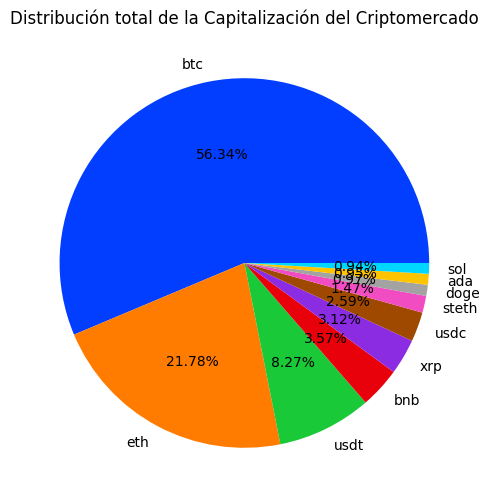

In [50]:
data = [element['value'] for element in global_data['market_cap_percentage']]
keys = [element['name'] for element in global_data['market_cap_percentage']]

palette_color = sns.color_palette('bright')
plt.figure(figsize=(6,6))
plt.title('Distribución total de la Capitalización del Criptomercado')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.02f%%',)
plt.show()

Es crucial señalar que el gráfico anterior ilustra la distribución de la capitalización total en el criptomercado. Como se puede observar, el mercado en su conjunto está dominado por 10 criptomonedas principales, y en este panorama, Bitcoin ocupa una posición destacada al representar el 56.10% de la capitalización total del mercado de criptomonedas.

Un análisis más profundo revela que esta alta capitalización de Bitcoin se conoce en el criptomercado como la 'Dominancia de Bitcoin'. En resumen, este término refleja que Bitcoin, al ser la primera criptomoneda y ser considerada tanto como el "oro digital" como uno de los activos más escasos, lidera el criptomercado. Esto significa que su valor influye directamente en los precios de las demás criptomonedas. En consecuencia, todas las gráficas en el criptomercado están correlacionadas con las fluctuaciones de precios de Bitcoin. Esta correlación será más evidente al examinar las gráficas detalladas posteriormente.

Para obtener más información al respecto, puedes visitar el siguiente enlace: https://academy.binance.com/es/articles/what-is-btc-dominance

### **Categorías de Criptomonedas**

De acuerdo a unos de los endpoints provistos por la Api de CoinGecko, las criptomoendas se pueden clasificar de acuerdo a ciertas caracteristicas. Como uno de los criterios de evaluacion de esta evaluando

In [ ]:
market_categories = pd.DataFrame(cg.get_coins_categories())
market_categories.head(5)

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,layer-1,Layer 1 (L1),8.794229e+11,0.099551,,[https://assets.coingecko.com/coins/images/1/s...,1.328905e+10,2023-08-15T16:20:21.335Z
1,smart-contract-platform,Smart Contract Platform,3.406447e+11,-0.009895,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,6.851595e+09,2023-08-15T16:20:07.187Z
2,stablecoins,Stablecoins,1.247620e+11,-0.409359,,[https://assets.coingecko.com/coins/images/325...,2.248449e+10,2023-08-15T16:20:06.819Z
3,alleged-sec-securities,Alleged SEC Securities,9.191416e+10,-0.029661,Tokens and cryptocurrencies alleged to be secu...,[https://assets.coingecko.com/coins/images/825...,2.873357e+09,2023-08-15T16:25:01.397Z
4,exchange-based-tokens,Exchange-based Tokens,5.898532e+10,-0.532143,These tokens are normally associated with both...,[https://assets.coingecko.com/coins/images/825...,9.033835e+08,2023-08-15T16:20:09.433Z


Como uno de los criterios de seleccion de cripto moendas va en funcion del a capitalizacion del mercado, las categorias se organziaron tambien de acuerdo a este criterio:

[Text(0, 0.5, 'Categoría Cripto'),
 Text(0.5, 0, 'Capitalización del Mercado'),
 Text(0.5, 1.0, 'Categorías Criptos Ordenadas por Capitalización')]

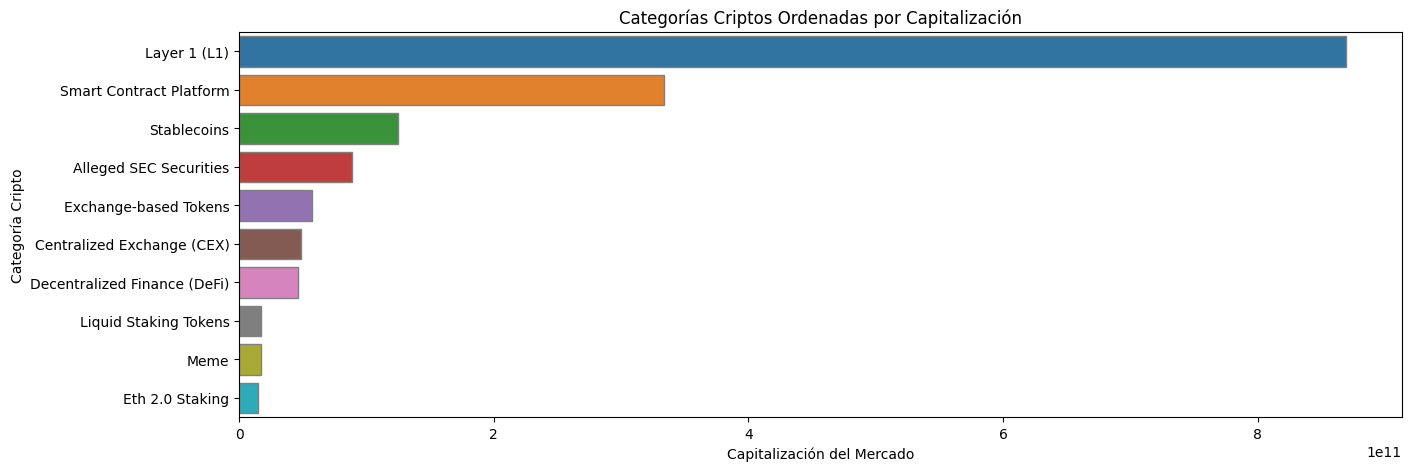

In [38]:
plt.figure(figsize=(15, 5))
market_categories = pd.DataFrame(cg.get_coins_categories())
fig = sns.barplot(data=market_categories.iloc[0:10, :], x="market_cap", y="name", capsize=.4, edgecolor=".5")
fig.set(
  ylabel='Categoría Cripto',
  xlabel='Capitalización del Mercado',
  title='Categorías Criptos Ordenadas por Capitalización'
)

Como se puede apreciar, las criptomonedas del tipo 'Layer_1' son las que ostentan la mayor capitalización, y esta categoría incluye al Bitcoin. A medida que avanzamos en las categorías, la capitalización disminuye de manera uniforme, llegando a las criptomonedas de finanzas descentralizadas (DeFi), en las cuales la capitalización ya no es tan significativa.

Para este análisis, no se seleccionó una criptomoneda de una categoría en particular. En su lugar, se llevó a cabo una investigación exhaustiva sobre el significado de cada categoría con el fin de descartar ciertas monedas en caso de que pertenecieran a una categoría específica.

Las categorías que no se recomiendan para una primera incursión en el mundo de las criptomonedas son:

- **Stablecoins:** Tampoco se recomienda seleccionar monedas de esta categoría, ya que están vinculadas al valor de una moneda fiduciaria. En consecuencia, dado que el dinero fiduciario tiende a devaluarse con el tiempo, estas monedas pueden perder valor a lo largo del tiempo a medida que crece la capitalización del criptomercado.

- **Categorías como Meme Coins o Shit Coins:** Se sugiere evitar categorías de monedas como las mencionadas, así como también las stablecoins. Aunque algunas monedas puedan pertenecer a estas categorías, como es el caso de Dogecoin (con una capitalización del 1.2% del mercado), este tipo de monedas carecen de un proyecto subyacente sólido que respalde su valor. Su precio suele depender principalmente de la comunidad que las respalda.

En resumen, es crucial tener en cuenta estas consideraciones al explorar diferentes categorías de criptomonedas y seleccionar aquellas con proyectos sólidos y fundamentos respaldados por la comunidad y la tecnología.


## **Monedas de Recomendación**

Siguiendo los criterios previamente establecidos, se realizaron exclusiones de ciertas categorías de criptomonedas que no se consideraron apropiadas para inversión, y se seleccionaron únicamente aquellas monedas que tienen una relevancia destacada en el criptomercado basada en su capitalización de mercado. En este contexto, se identificaron las siguientes monedas como candidatas para inversión:

- Bitcoin (BTC)
- Ethereum (ETH)
- Solana (SOL)
- Binance Coin (BNB)
- Cardano (ADA)
- Staked Tether (STETH)
- Ripple (XRP)
- Tron (TRX)
- Polygon (MATIC)
- Polkadot (DOT)

Dado este panorama, la cantidad de inversión asignada a cada moneda o el peso relativo que se otorga a cada una depende de un análisis más profundo de las características conceptuales de las criptomonedas en cuestión y de las preferencias individuales. Sin embargo, es recomendable asignar la mayor parte del capital a Bitcoin y Ethereum. Aunque su elevada capitalización de mercado no garantiza los mayores rendimientos de inversión, representan opciones más seguras debido a su posición de liderazgo en términos de capitalización en el mercado.


## **Exchanges**

Por ultimo, se consideró importante saber cuales son los exchanges mas relevantes dentro del entorno criptos. Un exchanges se podría se puede considerar como las casas de cambio para las cripto moendas, aqui se comercialzian y se ofrencen diferntes tipos de productos financieros, como mercados de futuros, saltikng de criptomoendas, apalancamiento, etc.


[Text(0, 0.5, 'Exchange'),
 Text(0.5, 0, 'Volumen de comercialización del Bitcoin en las últimas 24 horas'),
 Text(0.5, 1.0, 'Exchanges ordenados segun Ranking de Confianza')]

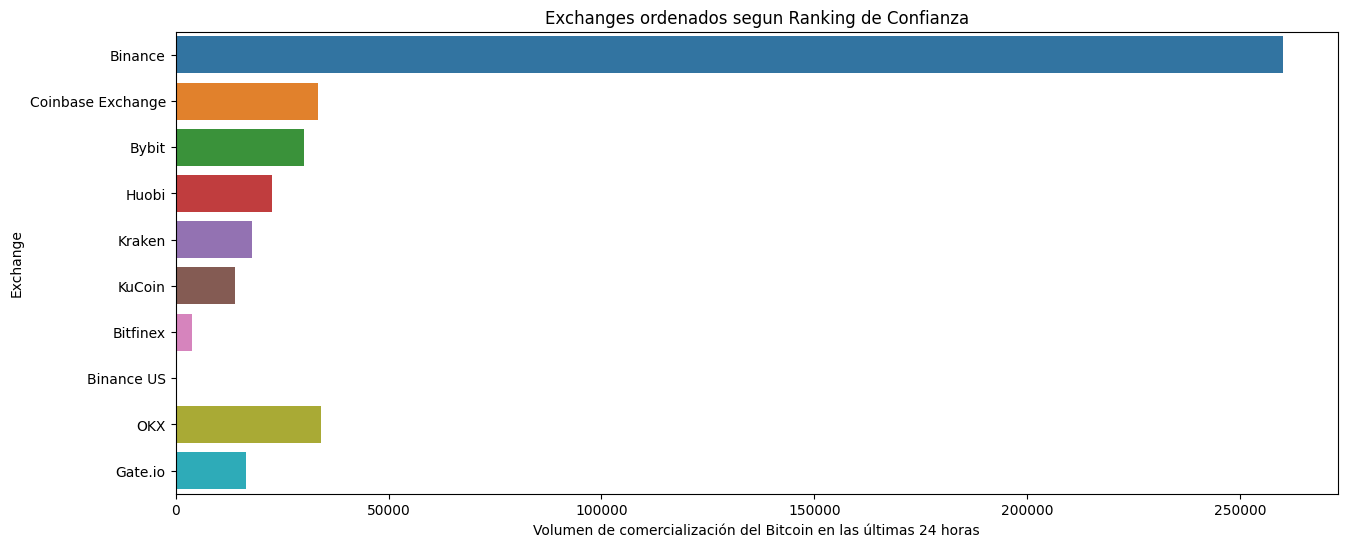

In [29]:
plt.figure(figsize=(15,6))

exchanges = pd.DataFrame(cg.get_exchanges_list())
exchanges_top_10_trust = exchanges.sort_values(by='trust_score_rank', ascending=True).head(10)
fig = sns.barplot(data=exchanges_top_10_trust, x="trade_volume_24h_btc", y="name")
fig.set(
  ylabel='Exchange',
  xlabel='Volumen de comercialización del Bitcoin en las últimas 24 horas',
  title='Exchanges ordenados según Ranking de Confianza'
)

Binance es el Exchange más importante del criptomercado por una diferencia bastante grande. Se puede apreciar en su alto nivel de comercialización de bitcoin en las últimas 24 horas y porque es la cripto número uno en el ranking de confianza.

### **Evaluación historica de las criptos**

Tras haber seleccionado las criptos a estudiar, se evaluó las gráficas históricas del precio y del volumen de comercialización de todas.

In [17]:
def get_data_historical_kpi(id: str, vs_currency: str, days, kpi: str) -> pd.DataFrame:
  coin_data = cg.get_coin_market_chart_by_id(id=id,vs_currency=vs_currency, days=days, interval='daily')
  kpi_data = []
  for data in coin_data[kpi]:
    kpi_data.append(data[1])
  coin_data_df = pd.DataFrame(data={id: kpi_data})
  return coin_data_df

def show_historical_chart(id):
  chart_df_prices = get_data_historical_kpi(id,'usd', 'max', "prices")
  chart_df_volumen = get_data_historical_kpi(id,'usd', 'max', "total_volumes")

  total_dates = chart_df_volumen.shape[0]
  dates = pd.date_range(end=pd.Timestamp.today(), periods=total_dates, freq='D')
  chart_df_prices['Fecha'] = dates
  chart_df_volumen['Fecha'] = dates

  _, ax = plt.subplots(1, 2, figsize=(15,4))
  fig = sns.lineplot(ax=ax[0], data=pd.DataFrame(chart_df_prices).reset_index(), x='Fecha', y=id)
  fig.set(ylabel='Precio', title='Precio Histórico de ' + id)

  fig = sns.lineplot(ax=ax[1], data=pd.DataFrame(chart_df_volumen).reset_index(), x='Fecha', y=id)
  fig.set(ylabel='Volumen de comercialización', title='Volumen de comercialización de ' + id)

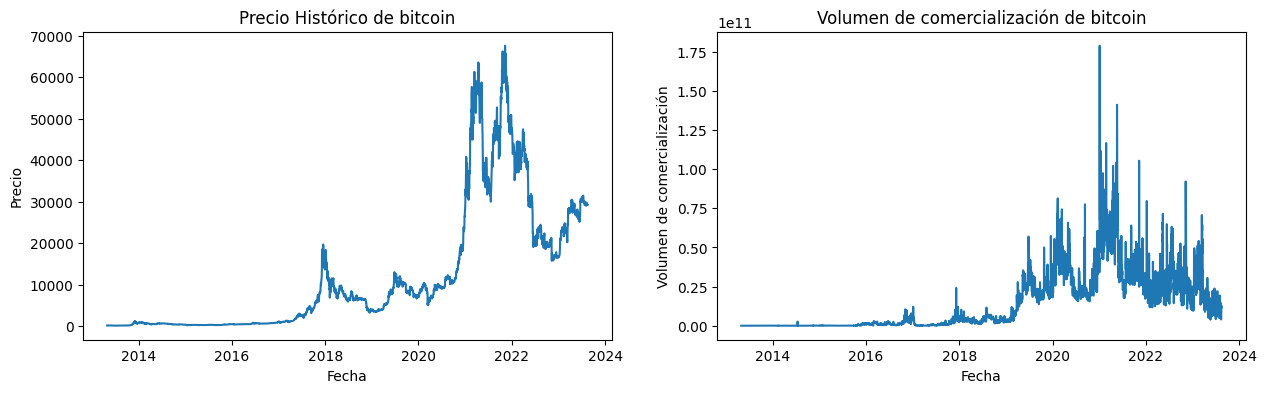

In [18]:
show_historical_chart('bitcoin')

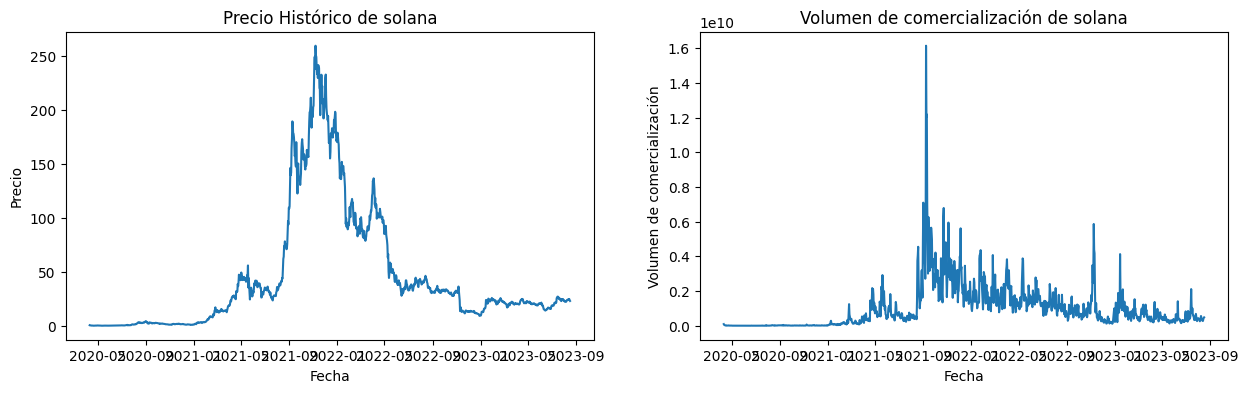

In [19]:
show_historical_chart('solana')

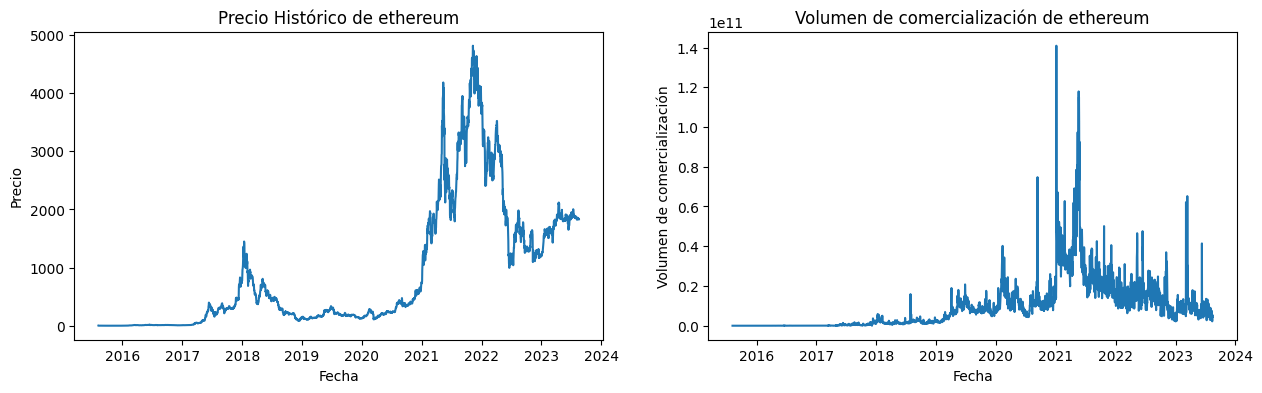

In [20]:
show_historical_chart('ethereum')

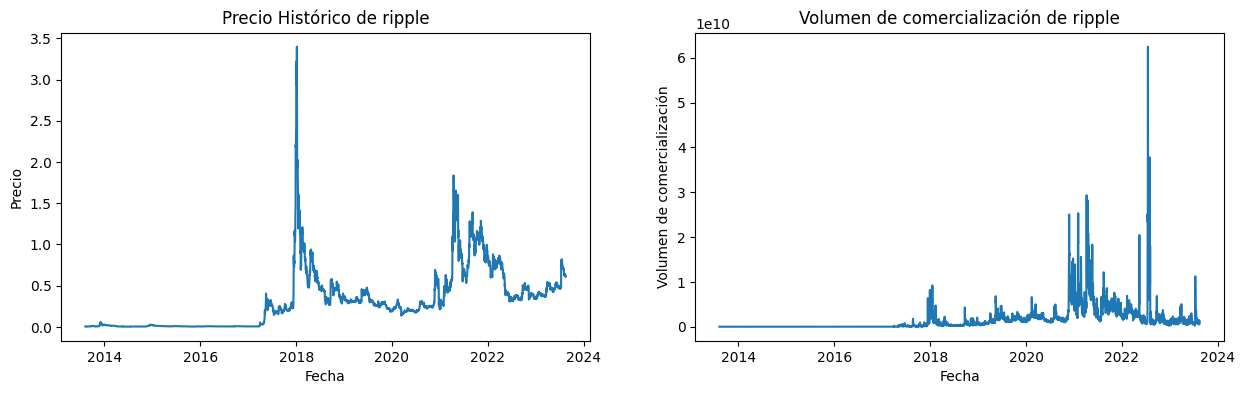

In [21]:
show_historical_chart('ripple')

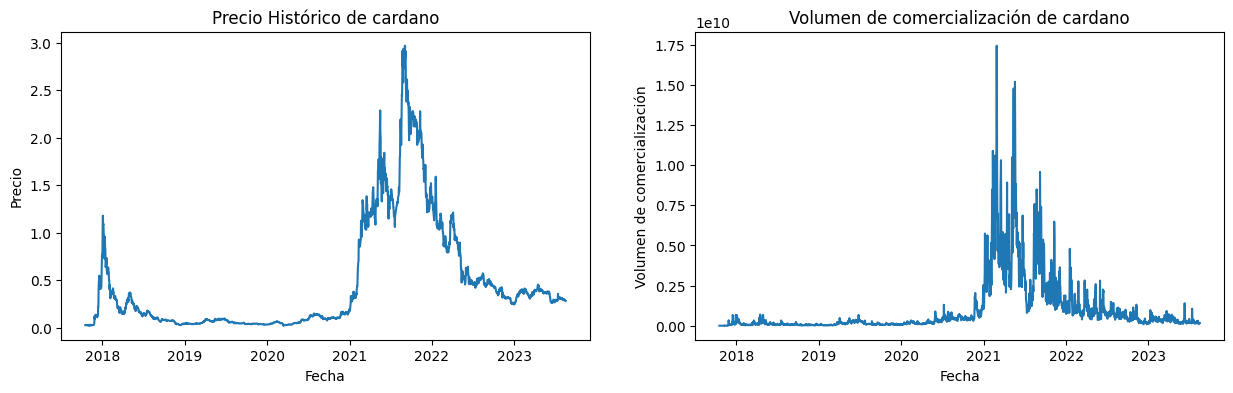

In [22]:
show_historical_chart('cardano')

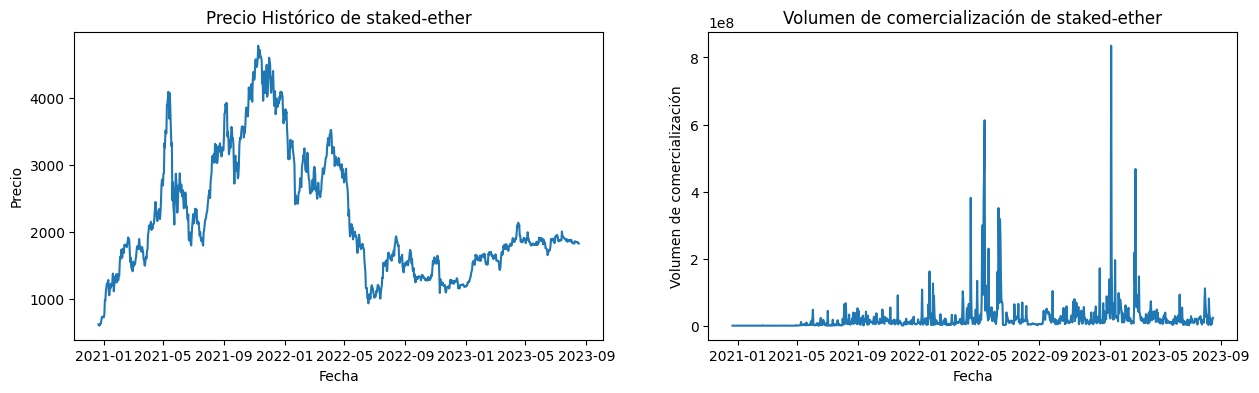

In [23]:
show_historical_chart('staked-ether')

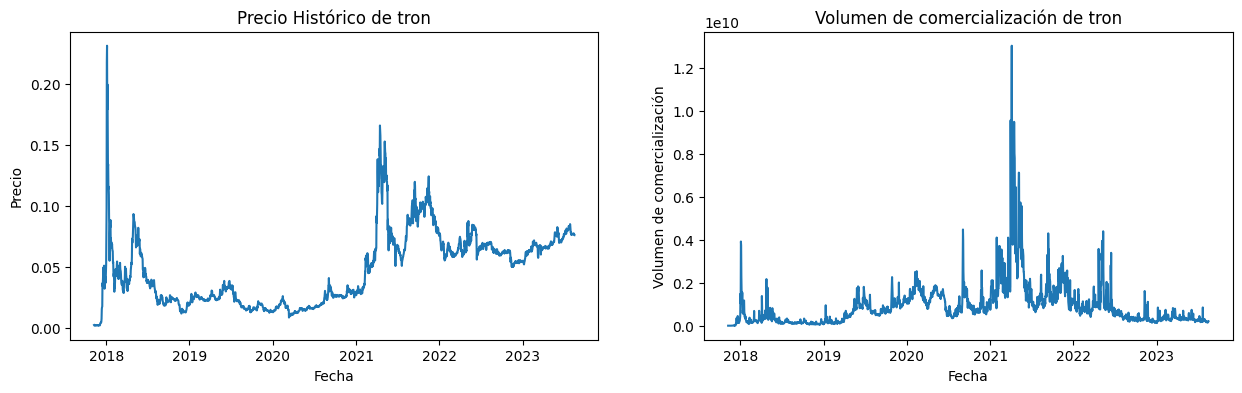

In [24]:
show_historical_chart('tron')

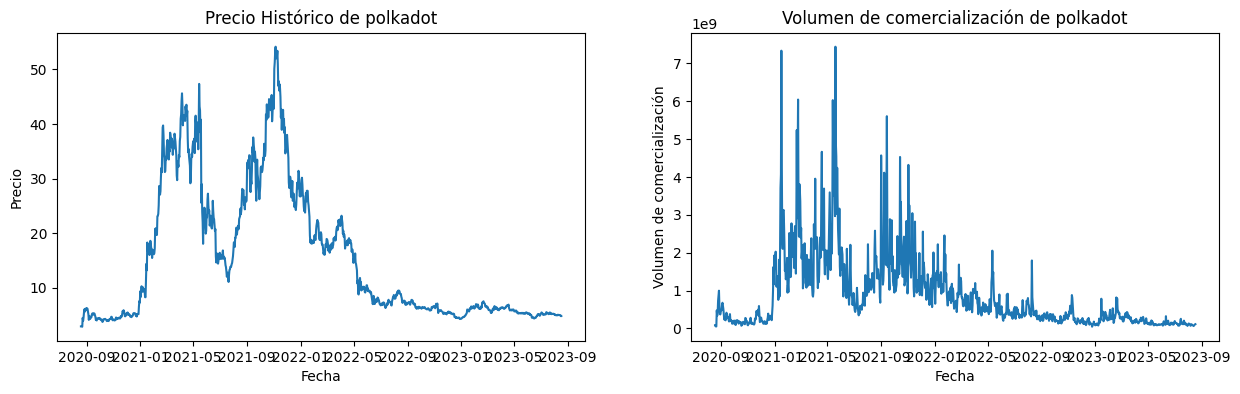

In [25]:
show_historical_chart('polkadot')

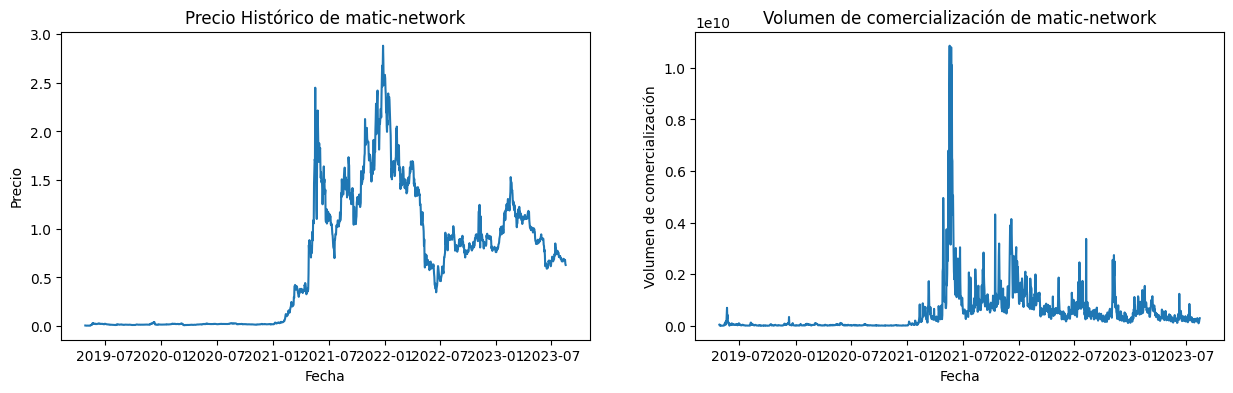

In [26]:
show_historical_chart('matic-network')

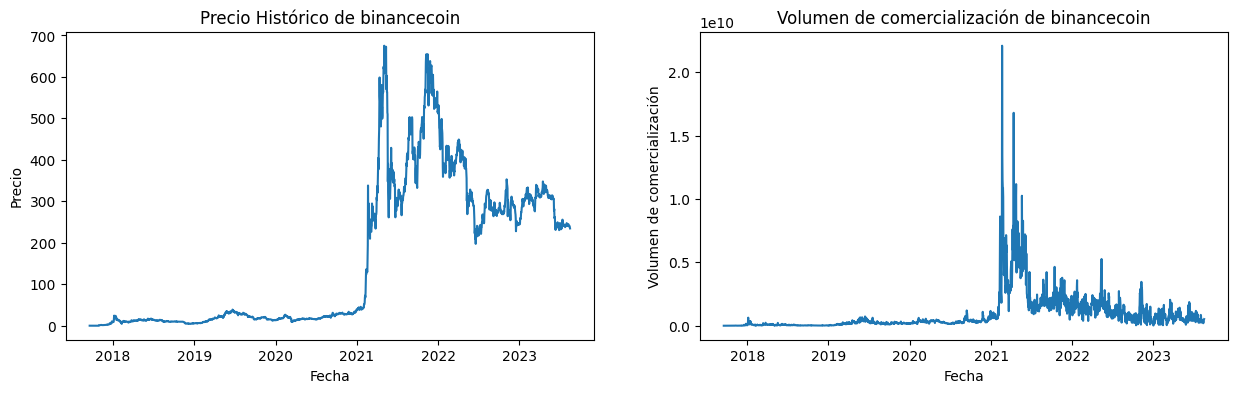

In [27]:
show_historical_chart('binancecoin')

## **Conclusiones**

Tras realizar una análisis de todas las graficas y sus tendencias, se pudieron obtener las siguientes conclusiones:

- **Histórico de Datos y Correlación con Bitcoin:** Se observa que Bitcoin tiene el conjunto de datos más extenso entre las diez criptomonedas analizadas, abarcando desde 2014. Además, todas las criptomonedas muestran una correlación con el gráfico de Bitcoin, que se ve influenciada por la dominancia de esta moneda. Este aspecto es crucial ya que eventos futuros que impacten positivamente el precio de Bitcoin podrían resultar en aumentos en otras inversiones.

- **Tendencia Alcista General:** En los gráficos de alta temporalidad, se aprecia una tendencia alcista en todas las criptomonedas debido a la correlación alcista con Bitcoin. Esto sugiere que el mercado en su conjunto está en una tendencia alcista a largo plazo. Independientemente de la moneda, todas las selectas parecen ser propuestas sólidas para inversión.

- **Patrón de Aumento y Caída en 2021:** Un patrón común en todas las criptomonedas es el fuerte aumento de precios a principios de 2021, con aumentos de hasta un 600% en la mayoría de los casos, seguido por una corrección en los meses posteriores. Este patrón se repite en todas las monedas y refleja la volatilidad inherente al mercado.

- **Repunte Alcista en 2018:** Un segundo patrón relevante se evidencia en 2018 para varias criptomonedas: Bitcoin, XRP, Cardano, Solana y Ethereum. En este año, se experimentó un repunte alcista que llevó a nuevos máximos históricos. En las otras criptomonedas, no hay suficientes datos históricos para analizar este comportamiento.

- **Exchange idoneo**: Binance es el exchange por excelencia en el criptomercado, tanto por su alto volumen de trading como por su nivel se confianza. Ademas, el BNB, la criptomoneda propia de la plataforma, se sitúa en el top 10 de criptos por capitalizacion del mercado.

- **Relación con las Recompensas de Minería de Bitcoin:** Se identificó que estos repuntes alcistas a finales de 2018 y 2022 coincidieron con eventos en los que las recompensas por la minería de Bitcoin se redujeron. Esta observación respalda la idea de que el mercado es cíclico y sugiere que podría esperarse un patrón similar en 2025 o 2026, cuando se produzca la próxima reducción de recompensas. Cabe resutlar que este mismo patrón ocurrió en el año 2014, en el caso del bitcoin.

- **Volumen de Comercialización y Precio de Bitcoin:** Aunque el volumen de comercio de Bitcoin muestra una tendencia bajista en los últimos meses, el precio de Bitcoin sigue una tendencia alcista. Esto indica un mayor interés en la compra de Bitcoin. Si se repitiera el volumen de comercio de anteriores máximos históricos, podríamos esperar patrones anteriores que conduzcan a nuevos máximos históricos.

- **Potencial de Nuevos Máximos Históricos:** Considerando la fuerte correlación entre las criptomonedas y el Bitcoin, si el mercado cripto en su conjunto experimenta una nueva ola de volumen de comercialización, podríamos anticipar nuevos máximos históricos en todas las criptos selectas.

- **Precio en Relación al Volumen de Comercialización:** A pesar de los volúmenes de comercialización actuales más bajos, los precios se encuentran en niveles más altos en comparación con años anteriores con niveles similares de comercio. Esto sugiere que un aumento en el volumen de comercio podría llevar a nuevos máximos en todas las criptomonedas.

- **Recomendación de Portafolio:** En última instancia, todas las criptomonedas analizadas tienen proyectos sólidos respaldándolas. Sin embargo, la recomendación más sólida sería construir un portafolio que tenga Bitcoin y Ethereum como componentes principales, representando entre un 50% y 70% del capital total, mientras que el resto podría ser distribuido en otras criptomonedas.